# 1. Integración Monte Carlo

a) Aproxime el valor de $\int_{0}^{1}\frac{e^x-1}{e-1}dx$ usando el método MC de la Media Muestral


In [43]:
import numpy as np
from random import random
import math
#from fraccion import fraccion

def test_function(x):
    return (math.exp(x) - 1) / (math.e - 1)

def integ(func=test_function, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u=np.random.random_sample()
        muestreo.append(u)
        y=func(u)
        suma.append(y)

    return(np.mean(suma))

print("El valor de la integral es:", integ())

El valor de la integral es: 0.4166683278221908


b) Use la técnica de variables antitéticas para reducir la varianza. Indique el porcentaje en que se redujo la varianza.

In [51]:
import random
import numpy as np

def integral(n_muestras):
    integral_sum = 0
    sum_squared = 0

    for _ in range(n_muestras):
        x = random.uniform(0, 1)
        integral_sum += test_function(x)
        sum_squared += test_function(x) ** 2

    teta = integral_sum / n_muestras
    varianza = (sum_squared / n_muestras) - (teta ** 2)

    return teta, varianza

n_muestras = 100000
teta,varianza = integral(n_muestras)
print('Estimación de la integral:', teta)
print('Varianza:', varianza)
print('Reducción porcentual estimada empiricamente: ',100*(teta-varianza)/teta)

Estimación de la integral: 0.4174971615730937
Varianza: 0.08210379181375849
Reducción porcentual estimada empiricamente:  80.33428742260226


# 2. Líneas de espera. Resuelva por simulación el siguiente problema.

A un autolavado los autos llegan siguiendo una distribución de Poisson, con 4 autos por hora, que pueden esperar en el estacionamiento de la instalación, si el lugar del lavado está ocupado. El tiempo para lavar y limpiar un automovil es exponencial, con 10 minutos de promedio. Los automóviles que no se pueden estacionar en la instalación pueden esperar junto al lavado. Eso quiere decir que para todo fin práctico no hay límite del tamaño del sistema. ¿Qué capacidad debería tener el estacionamiento?  



# 3. Simulación Monte Carlo de Precios.
a) Descargue los datos históricos de Facebook (del 1 de julio de 2022 al 31 de abril de 2023) de Yahoo Finanzas, guárdelos en un DataFrame de Pandas e imprima el encabezado, grafique los rendimientos y determine el rendimiento promedio.

b) Realice las pruebas para determinar si los rendimientos siguen un movimiento browniano: histograma, gráfica cuantil-cuantil, test de kolmogorov.

In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('/content/sample_data/Datos históricos META.csv')
print(f'Descargados {df.shape[0]} renglones de datos.')

Descargados 208 renglones de datos.


In [24]:
! pip install --target=$nb_path investpy  # Se debe instalar la librería investpy

In [59]:
from statistics import mean, stdev, pstdev
from math import log
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import investpy
import scipy.stats as stats

In [33]:
df = pd.read_csv('/content/sample_data/Datos históricos META.csv')
df.columns

Index(['Fecha', 'Cierre', 'Apertura', 'Máximo', 'Mínimo', 'Vol.', '% var.'], dtype='object')

<ipython-input-30-a62a89af44c7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos=pd.read_csv("/content/sample_data/Datos históricos META.csv",header=0,index_col="Fecha",parse_dates=True) #le peidmos leer los datos del csv


Fecha
2023-04-28    240.32
2023-04-27    238.56
2023-04-26    209.40
2023-04-25    207.55
2023-04-24    212.79
               ...  
2022-08-07    170.88
2022-07-07    172.19
2022-06-07    169.77
2022-05-07    168.19
2022-01-07    160.03
Name: Cierre, Length: 208, dtype: float64


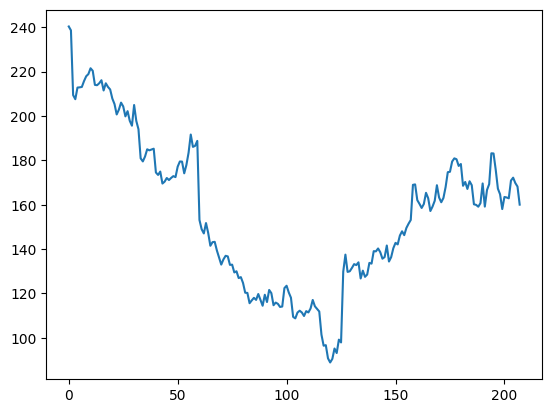


 El rendimiento medio es: 0.0026966517919760195,
 La desviación muestral es: 0.03811258581646849 
 La desviación poblacional es: 0.03811258581646849 ?n La desviación poblacional es: 0.03802041497823382


In [30]:
datos=pd.read_csv("/content/sample_data/Datos históricos META.csv",header=0,index_col="Fecha",parse_dates=True) #le peidmos leer los datos del csv


ts=datos["Cierre"] #que tome los valores de precio de cierre de la acción
print(ts)

lp=[] #creamos una lista vacia para los precios

for i in range(len(ts)):
     lp.append(ts.iloc[i])
plt.plot(lp) #grafica de los precios
plt.show()

#calcular los rendimientos

lr=[] #lista de rendimientos
for i in range(1,len(lp)):
     lr.append((lp[i-1]/lp[i])-1) #para lso rendimientos usamos la formula de el precio de cierre anterior entre el precio de cierre actual menos 1

print(f"\n El rendimiento medio es: {mean(lr)},\n La desviación muestral es: {stdev(lr)} \n La desviación poblacional es: {stdev(lr)} ?n La desviación poblacional es: {pstdev(lr)}")

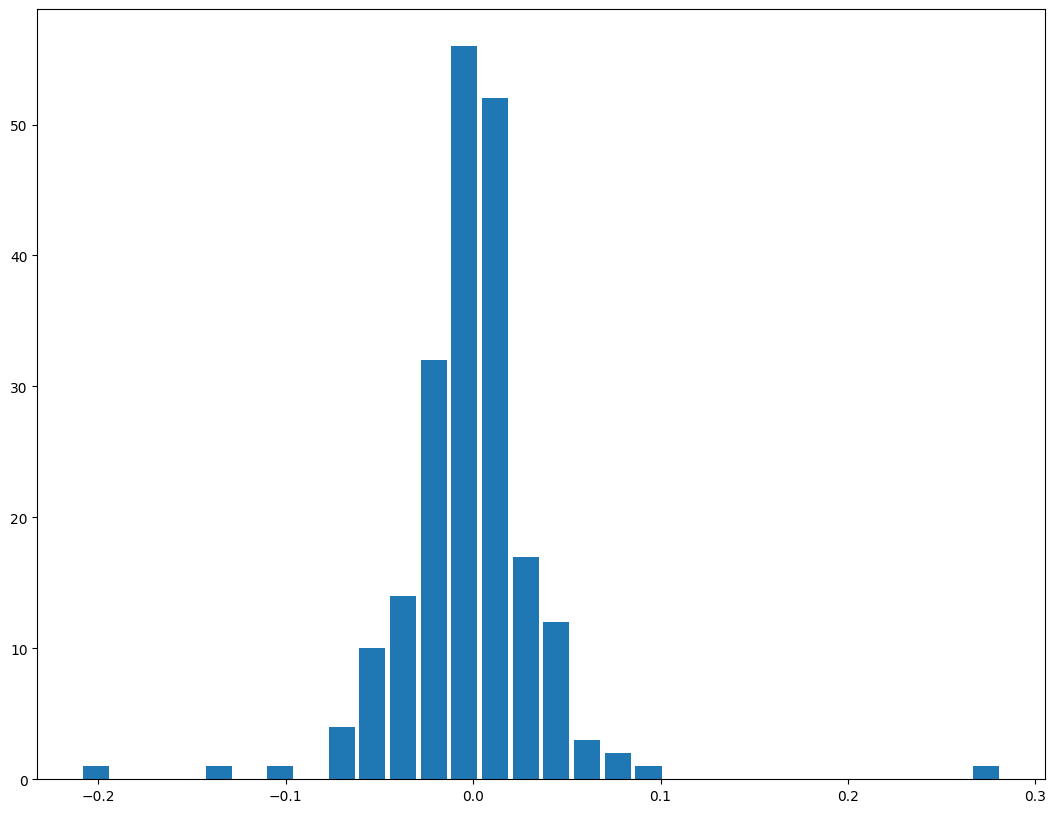

In [57]:
plt.figure(figsize=(13, 10))
plt.hist(lr, rwidth=0.85, bins=30)
plt.show()

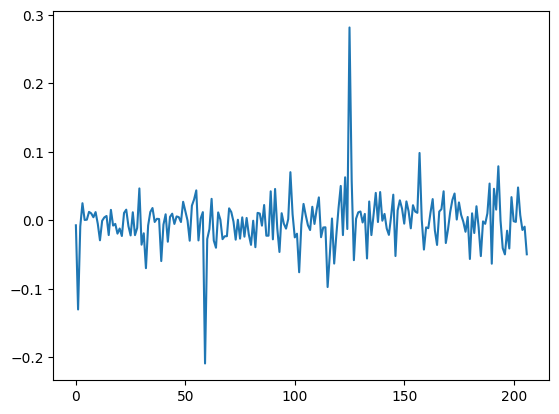

-0.0019642998595066252 0.03847975055548044


In [31]:
lr=[]
for i in range(1,len(lp)):
    lr.append(log(lp[i]/lp[i-1]))
plt.plot(lr)
plt.show()
print(mean(lr), stdev(lr))

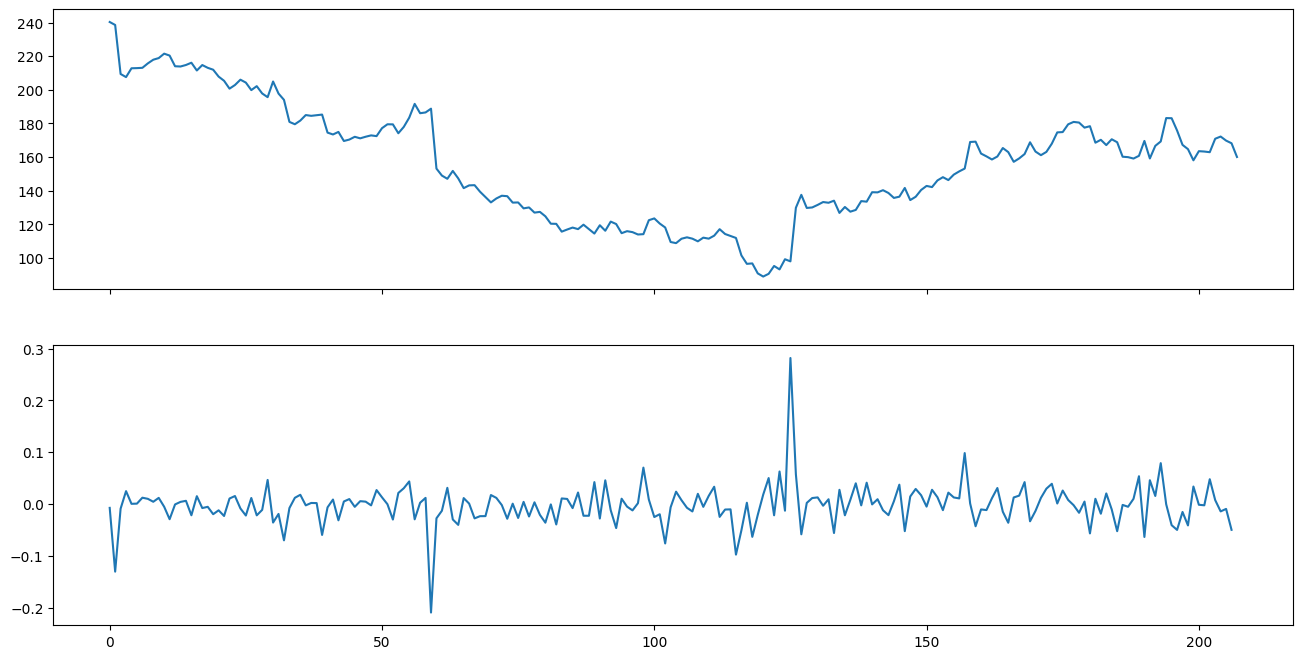

In [32]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)

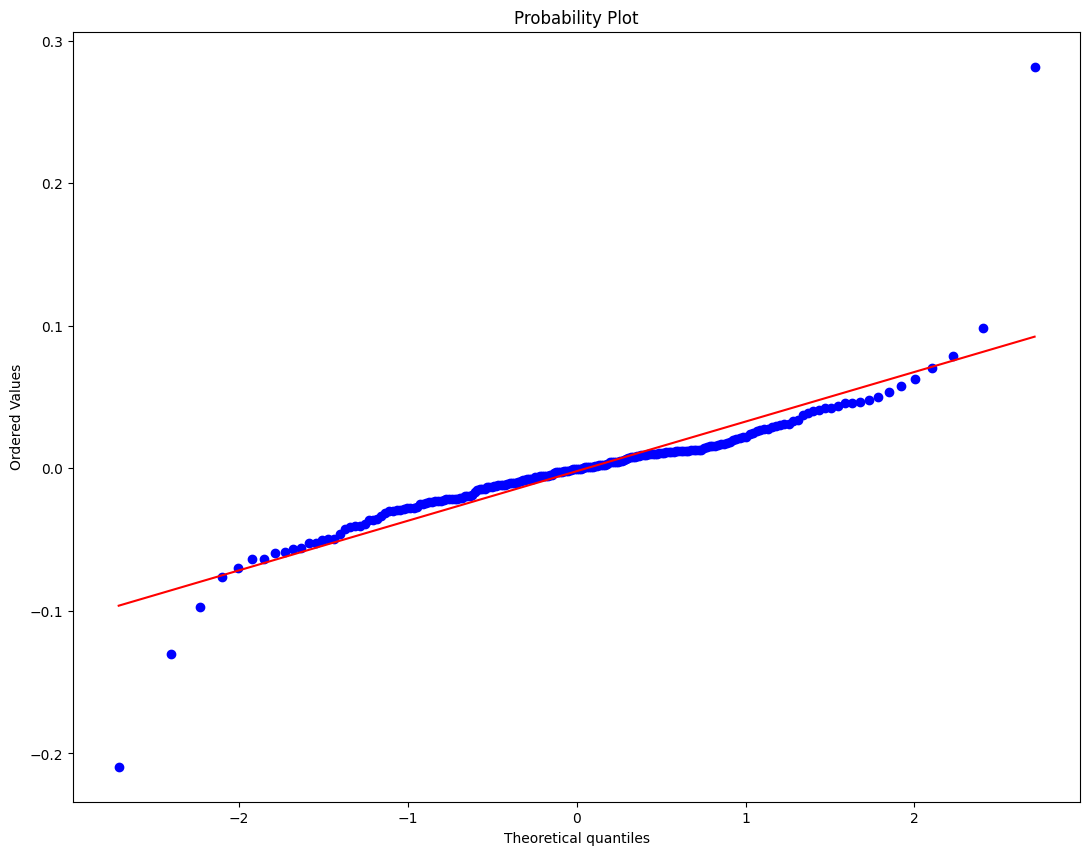

In [60]:
plt.figure(figsize=(13, 10))
stats.probplot(lr, dist='norm', plot=plt)
plt.show()

In [61]:
from scipy.stats import kstest
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.11875141138409095, pvalue=0.005318142799093903, statistic_location=0.018333145877854173, statistic_sign=1)

In [62]:
from random import gauss
mu=0.001
sigma=0.04  #sigma
p0=10
t=30

# Test de Kolmogorov-Smirnov
ks_stat, p_value = stats.kstest(lr, 'norm')
print("Estadístico de Kolmogorov-Smirnov:", ks_stat)
print("Valor p:", p_value)

Estadístico de Kolmogorov-Smirnov: 0.4588864468654581
Valor p: 2.1787288873633976e-40


c) Divida el conjunto de datos en un 70% para entrenamiento y 30% de prueba. Del conjunnto de entrenamiento determine mu y sigma, y úselos para predecir el precio en el conjunto de prueba. Grafique el resultado.

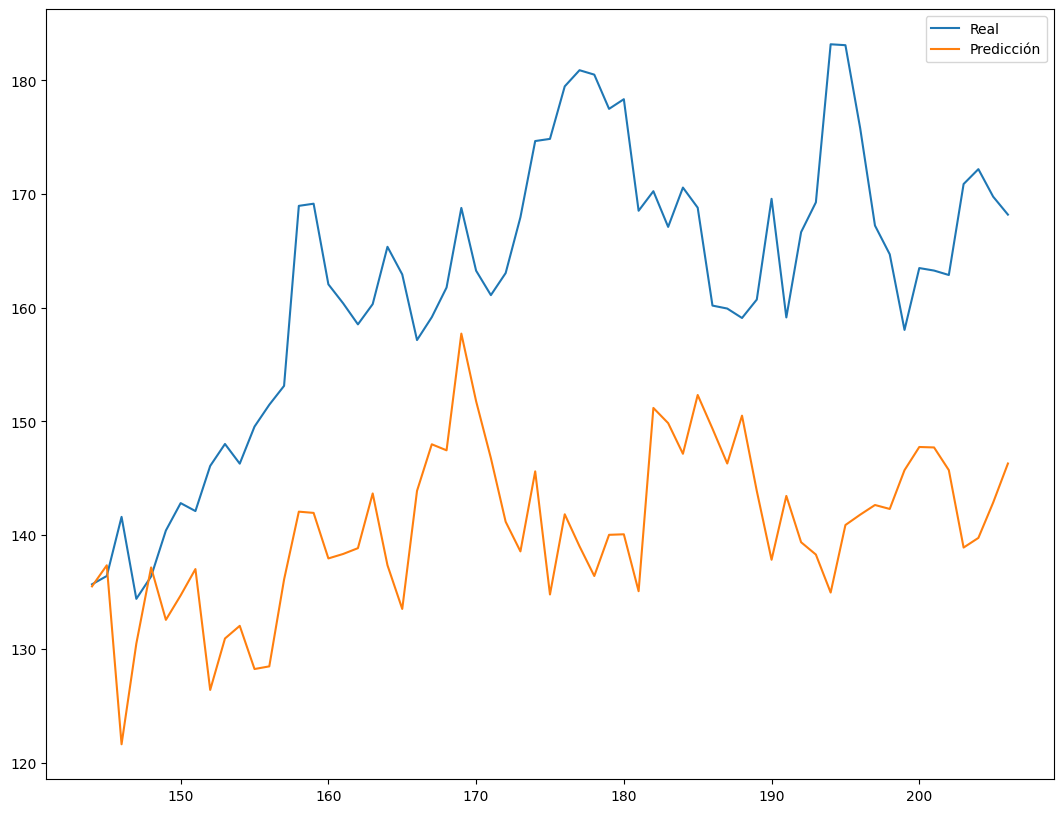

In [54]:
import numpy as np
import matplotlib.pyplot as plt

train_size = int(len(lr) * 0.7)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)


n_test = len(test_rendimientos)
predicted_prices = [df['Cierre'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Cierre'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.legend()
plt.show()


d) Repita el procedimiento para una partición entrenamiento-prueba del 80-20%.

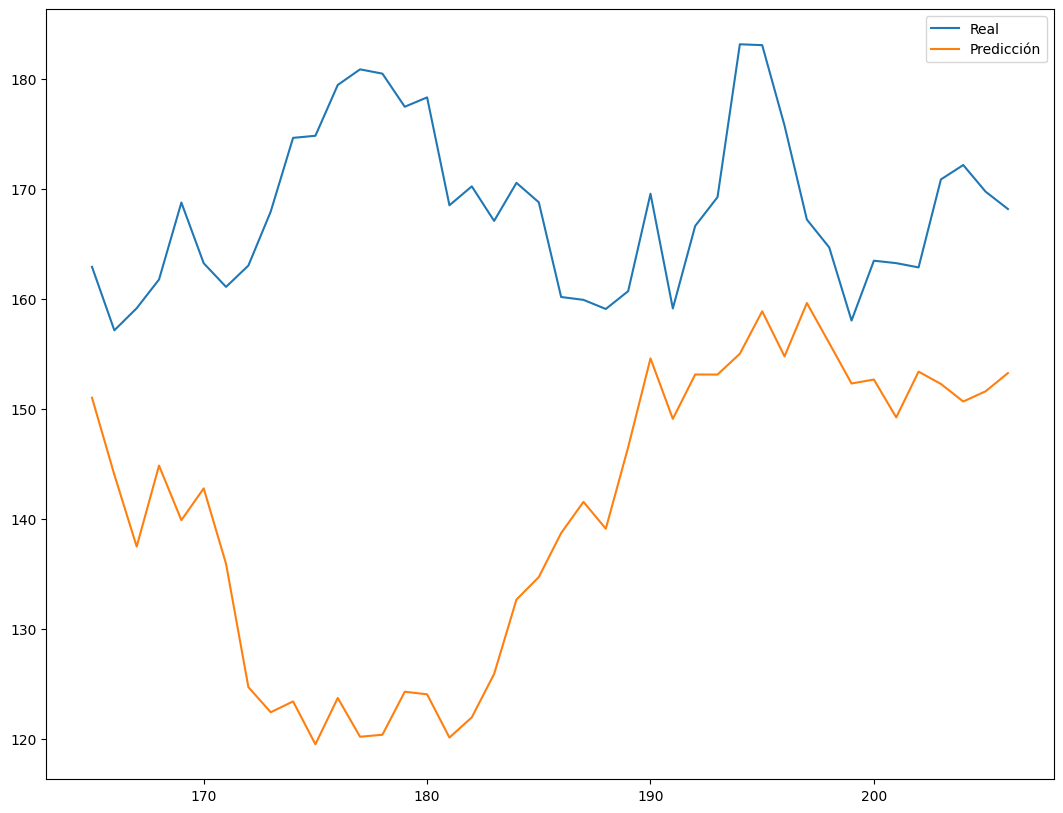

In [55]:
train_size = int(len(lr) * 0.8)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

# Calcular mu y sigma en el conjunto de entrenamiento
mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)

# Generar precios en el conjunto de prueba
n_test = len(test_rendimientos)
predicted_prices = [df['Cierre'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

# Graficar resultados
plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Cierre'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.legend()
plt.show()

e) Repita para una partición 90-10% y elabore algunas conclusiones a partir de las gráficas.

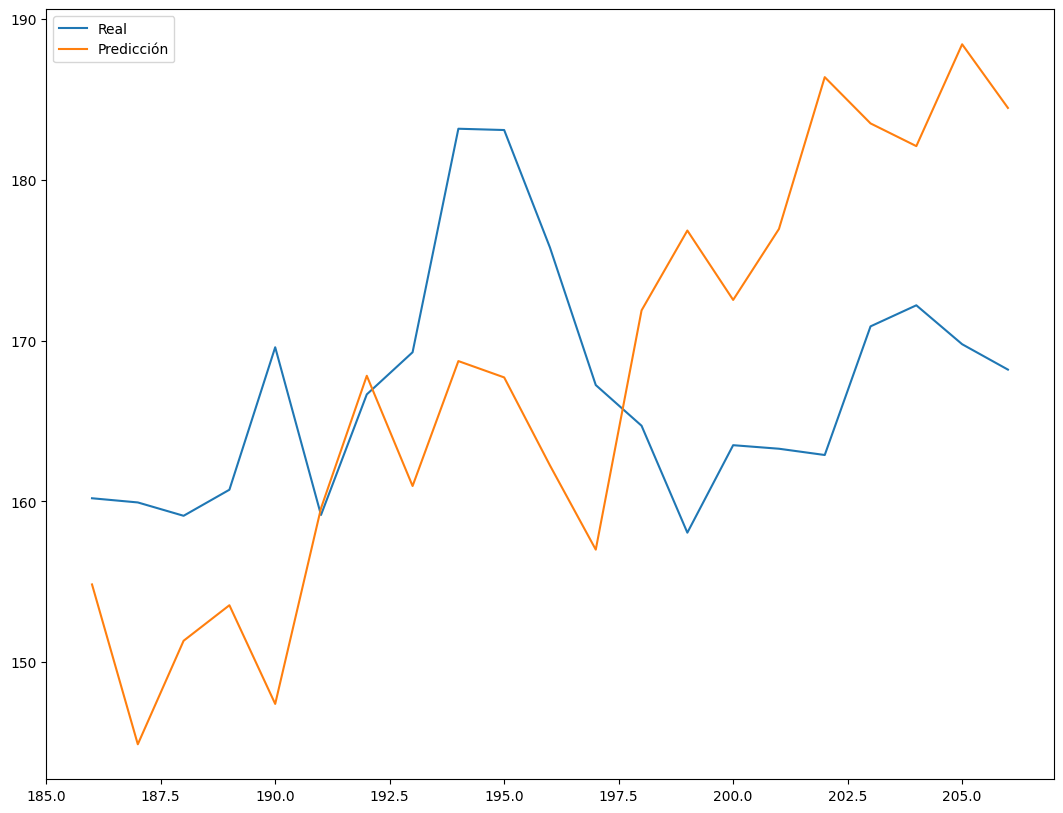

In [56]:
train_size = int(len(lr) * 0.9)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)

n_test = len(test_rendimientos)
predicted_prices = [df['Cierre'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Cierre'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.legend()
plt.show()

Utilice https://mx.investing.com/equities/facebook-inc-historical-data para obtener el documento csv ya que al descargarlo de yahoo no me tomaba la fecha deseada